In [2]:
# setup
import fastbook
fastbook.setup_book()
from fastbook import *

### Applications of deep learning

Hard to write code to do all these.

- NLP 
    - Answering questions
    - speech recognition
    - summarizing documents
    - classifying documents
    - finding names, dates, etc. in documents
    - searching for articles mentioning a concept
- Computer vision
    - Satellite and drone imagery interpretation (e.g., for disaster resilience)
    - face recognition
    - image captioning
    - reading traffic signs
    - locating pedestrians and vehicles in autonomous vehicles
- Medicine
    - Finding anomalies in radiology images, including CT, MRI, and X-ray images
    - counting features in pathology slides
    - measuring features in ultrasounds
    - diagnosing diabetic retinopathy
- Biology
    - Folding proteins
    - classifying proteins
    - many genomics tasks, such as tumor-normal sequencing and classifying clinically actionable genetic mutations
    - cell classification
    - analyzing protein/protein interactions
- Image generation
    - Colorizing images
    - increasing image resolution
    - removing noise from images
    - converting images to art in the style of famous artists
- Recommendation systems
    - Web search
    - product recommendations
    - home page layout
- Playing games
    - Chess, Go, most Atari video games, and many real-time strategy games
- Robotics
    - Handling objects that are challenging to locate (e.g., transparent, shiny, lacking texture) or hard to pick up
- Other applications
    - Financial and logistical forecasting, text to speech, and much more...

### Perceptron

<img alt="Natural and artificial neurons" width="500" caption="Natural and artificial neurons" src="../fastbook/images/chapter7_neuron.png" id="neuron"/>

### Parallel Distributed Processing (PDP)

The premise that PDP is using here is that traditional computer programs work very differently to brains, and that might be why computer programs had been (at that point) so bad at doing things that brains find easy (such as recognizing objects in pictures). The authors claimed that the PDP approach was "closer than other frameworks" to how the brain works, and therefore it might be better able to handle these kinds of tasks.


#### What is Machine Learning

Basic Idea: instead of telling the computer the exact steps required to solve a problem, show it examples of the problem to solve, and let it figure out how to solve it itself.

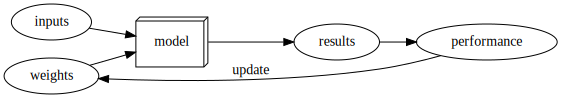

In [15]:
## Model training
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

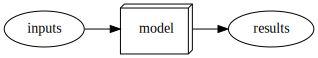

In [16]:
## trained model used for prediction is same as what a normal comupter code does
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

#### Deep Learning Jargon

- The functional form of the *model* is called its *architecture* (but sometimes also called models).
- The *weights* are called *parameters*.
- The *predictions* are calculated from the *independent variable*, which is the *data* not including the *labels*.
- The *results* of the model are called *predictions*.
- The measure of *performance* is called the *loss*.
- The loss depends not only on the predictions, but also the correct *labels* (also known as *targets* or the *dependent variable*); e.g., "dog" or "cat."


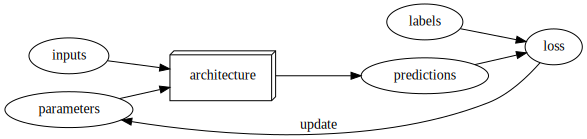

In [18]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')


Fundamental things needed to train a deep learning model:- A model cannot be created without data.
- A model can only learn to operate on the patterns seen in the input data used to train it.
- This learning approach only creates *predictions*, not recommended *actions*.
- It's not enough to just have examples of input data; we need *labels* for that data too (e.g., pictures of dogs and cats aren't enough to train a model; we need a label for each one, saying which ones are dogs, and which are cats).


### Limitations Inherent to Machine Learning

- Need enough labeled data. (eg: there can be a lot of X-rays where the disease is not labeled but with free text natural language reports)
- For recommendation systems, the model tends to output the products the user already has. (since it is trained with that data).
- Model interaction with enviroment(positive feedback loop). Where the more the model is used, the more biased the data becomes, making the model even more biased, and so forth.
   eg: a video recommendation systems (the genre which has more videos is recommended more to others as well).


### Cats and Dogs example

In [ ]:
# This gives us all of the functions and classes we will need to create a wide variety of computer vision models.
from fastai.vision.all import *

# downloads a standard dataset from the fast.ai datasets collection (if not previously downloaded) 
# extracts it (if not previously extracted), and returns a Path object with the extracted location
path = untar_data(URLs.PETS)/'images'

# method to identify the label. return True if the image is a cat else False. 
# labels cats based on a filename rule provided by the dataset creators (first letter caps for cats)
def is_cat(x): return x[0].isupper()

# tells fastai what kind of dataset we have, and how it is structured
# ImageDataLoaders -- class for image datasets
# Transormers -- item_tfms are applied to each item
# label_func -- for computer vision datasets the label is in the filename
# valid_pct -- randomly hold out 20% of the data as vaidation set and use it to measure the accuracy of the model.
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

In [ ]:
uploader = widgets.FileUpload()
uploader

In [ ]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [ ]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")